In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from IPython.display import FileLink
import shutil

In [39]:
#Membaca file csv
file_path = 'D:\Tugas Akhir\Stroke\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
# Menampilkan jumlah data awal dataset sebelum diubah
jumlah_data_awal = df.shape[0]
print("Jumlah data awal sebelum perubahan:", jumlah_data_awal)
df = df.drop('id', axis=1)
df.head()

Jumlah data awal sebelum perubahan: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
# Menghapus baris dengan nilai 'other' pada kolom 'age'
df = df[df['gender'] != 'Other']

# Menghapus baris dengan nilai 'children' atau 'Never_worked' pada kolom 'work_type'
df = df[~df['work_type'].isin(['children', 'Never_worked'])]

# Menghapus baris dengan nilai bmi lebih dari 60 dan usia kurang dari 25
df = df[(df['bmi'] <= 60) & (df['age'] >= 25)]
jumlah_data_akhir = df.shape[0]
print("Jumlah data akhir setelah perubahan:", jumlah_data_akhir)
df.head()

Jumlah data akhir setelah perubahan: 3689


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [41]:
print("Jumlah data unik sebelum perubahan:")
print(df['work_type'].value_counts())

Jumlah data unik sebelum perubahan:
work_type
Private          2341
Self-employed     750
Govt_job          598
Name: count, dtype: int64


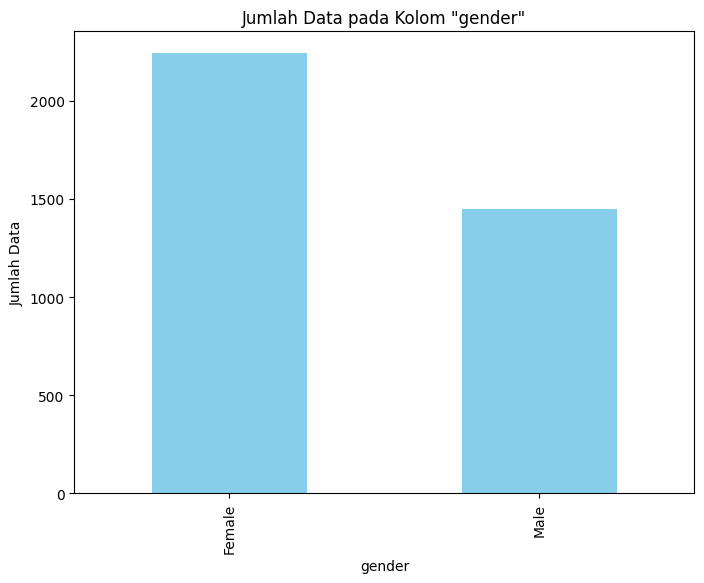

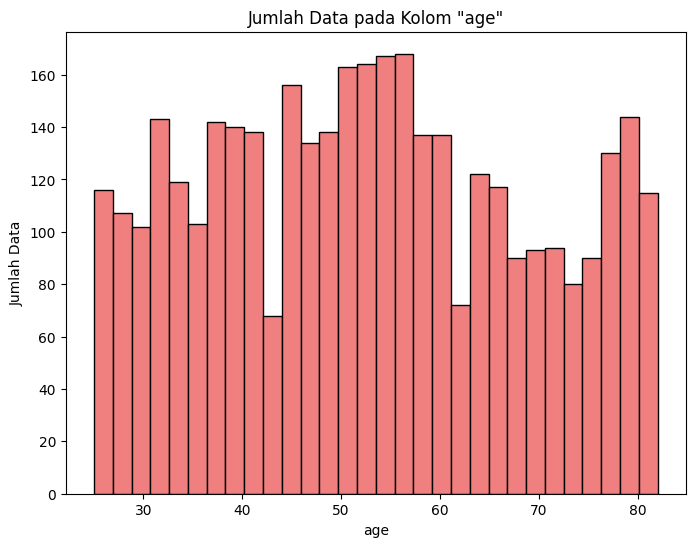

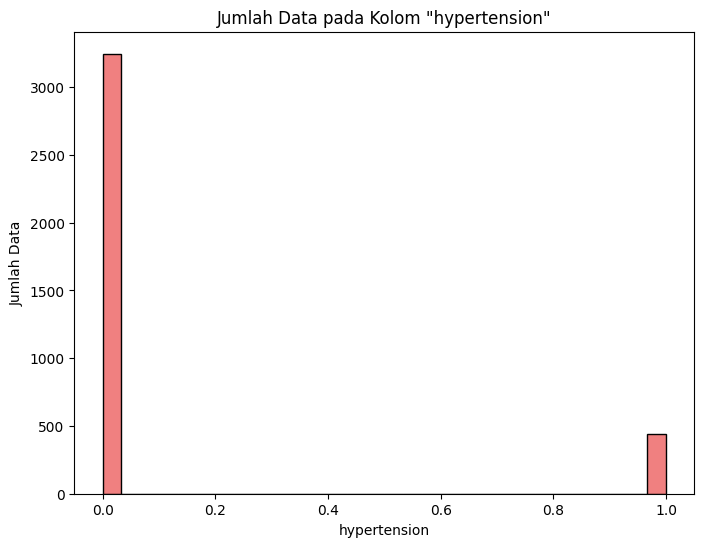

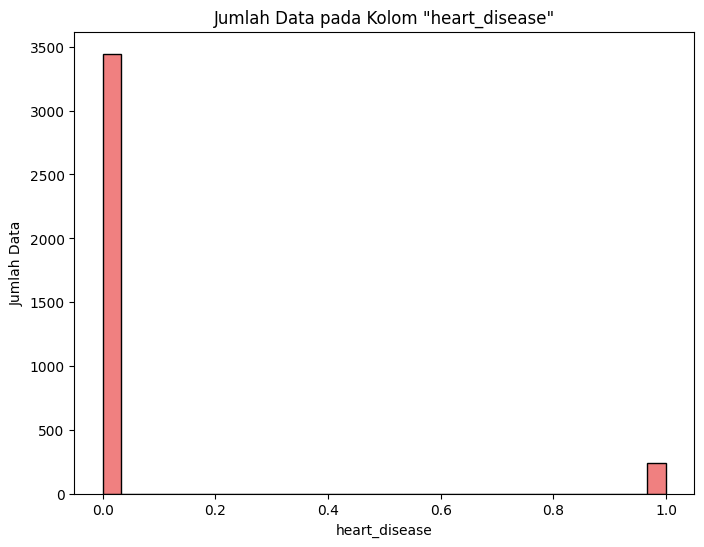

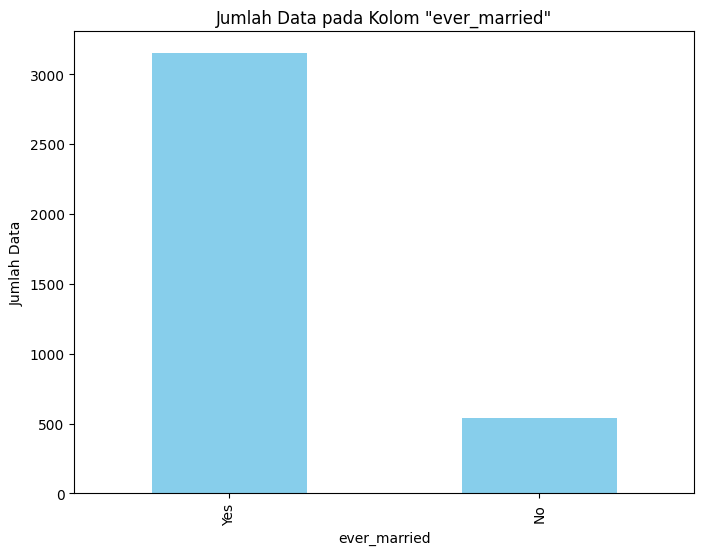

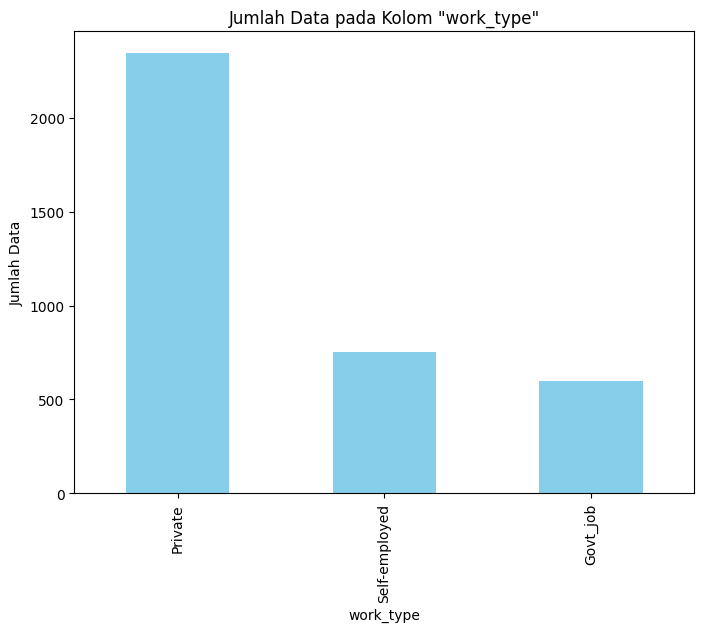

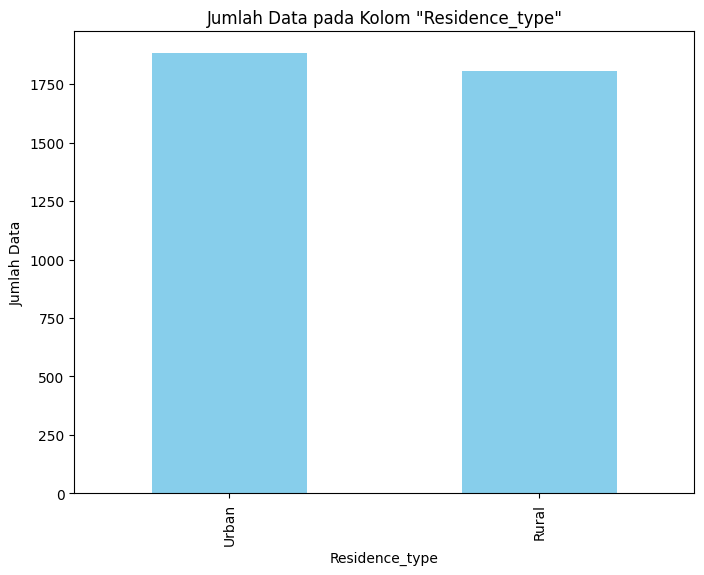

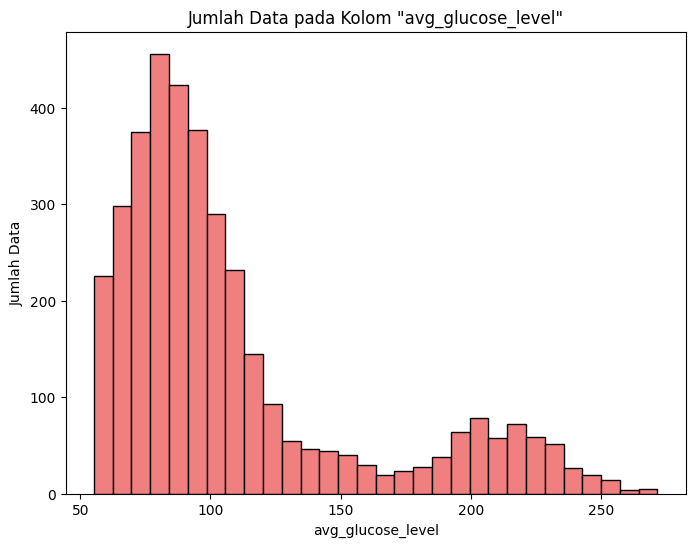

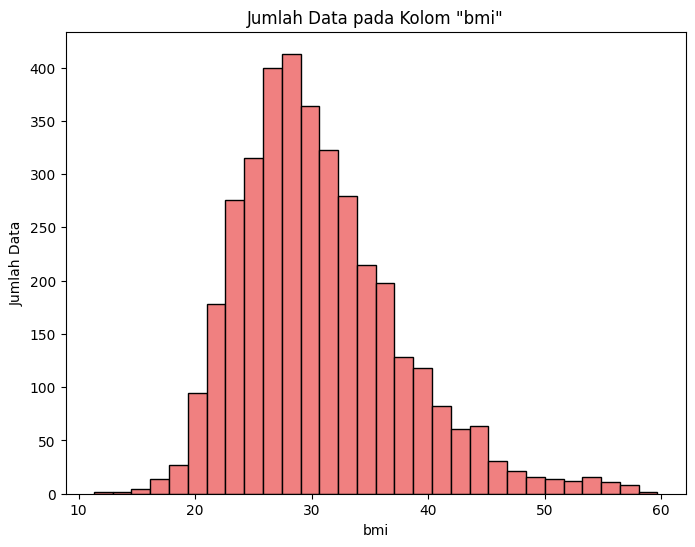

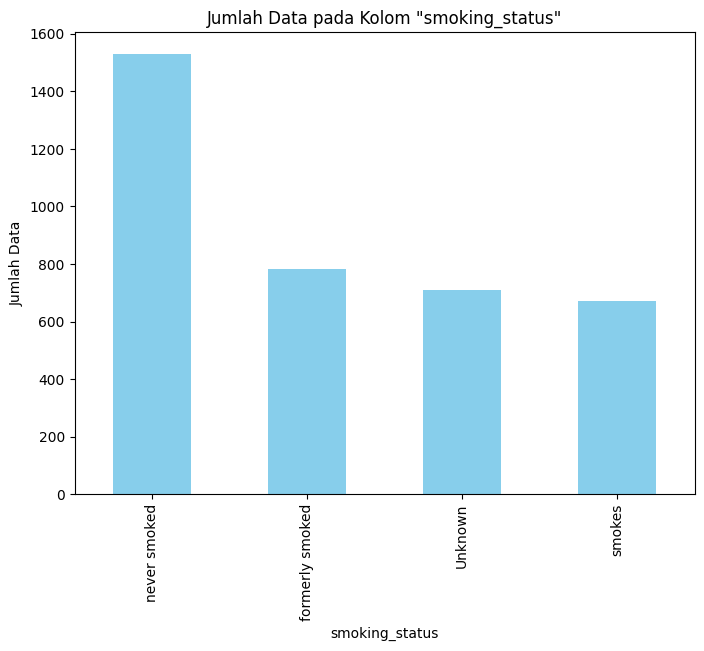

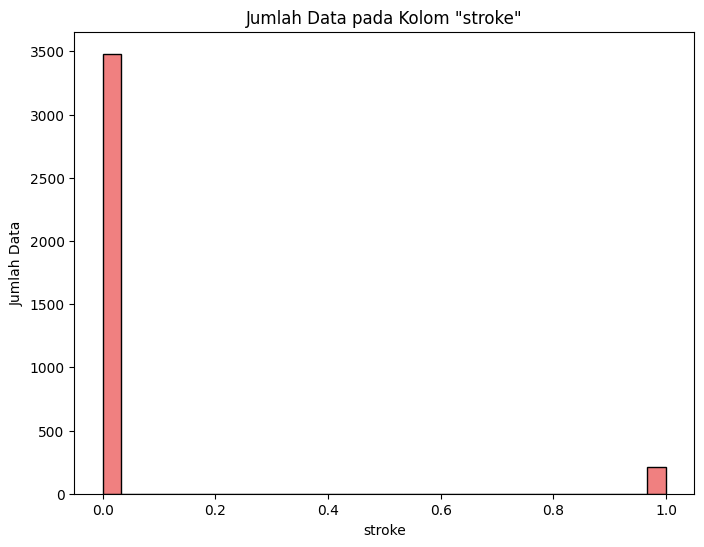

In [42]:
# Memilih kolom-kolom yang ingin diplot
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

<Axes: >

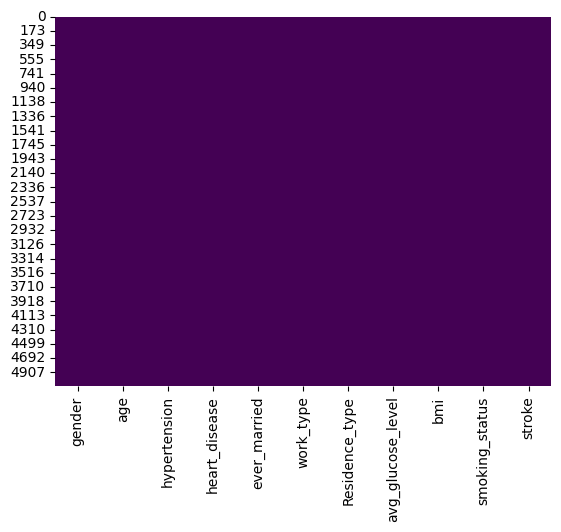

In [43]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [44]:
print(df['gender'].value_counts())
# Mengganti label 'male' menjadi 0 dan 'female' menjadi 1 pada kolom 'gender'
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df.head())

gender
Female    2242
Male      1447
Name: count, dtype: int64

Data setelah perubahan:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0       0  67.0             0              1          Yes        Private   
2       0  80.0             0              1          Yes        Private   
3       1  49.0             0              0          Yes        Private   
4       1  79.0             1              0          Yes  Self-employed   
5       0  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  


In [45]:
print(df['ever_married'].value_counts())
# Mengganti label 'Yes' menjadi 1 dan 'No' menjadi 0 pada kolom 'ever_married'
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

ever_married
Yes    3148
No      541
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,Rural,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [46]:
print(df['Residence_type'].value_counts())
# Mengganti label 'Urban' dan 'Rural' menjadi 0 dan 1 pada kolom 'Residence_type'
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

Residence_type
Urban    1881
Rural    1808
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,1,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [47]:
# One-hot encoding untuk kolom 'work_type'
x_work_type = df['work_type'].values.reshape(-1, 1)
encoder_work_type = OneHotEncoder()
x_work_type_encoded = encoder_work_type.fit_transform(x_work_type).toarray()
df_work_type_encoded = pd.DataFrame(x_work_type_encoded, columns=[f'work_type_{i}' 
                                                                  for i in range(x_work_type_encoded.shape[1])])
df_work_type_encoded


,work_type_0,work_type_1,work_type_2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
3684,0.0,1.0,0.0
3685,0.0,0.0,1.0
3686,0.0,0.0,1.0
3687,0.0,1.0,0.0


In [48]:
# One-hot encoding untuk kolom 'smoking_status'
x_smoking_status = df['smoking_status'].values.reshape(-1, 1)
encoder_smoking_status = OneHotEncoder()
x_smoking_status_encoded = encoder_smoking_status.fit_transform(x_smoking_status).toarray()
df_smoking_status_encoded = pd.DataFrame(x_smoking_status_encoded, columns=[f'smoking_status_{i}'
                                                                             for i in range(x_smoking_status_encoded.shape[1])])
df_smoking_status_encoded

,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
3684,0.0,0.0,1.0,0.0
3685,0.0,0.0,1.0,0.0
3686,0.0,0.0,1.0,0.0
3687,0.0,1.0,0.0,0.0


In [49]:
# Reset index untuk kedua DataFrame hasil one-hot encoding
df_work_type_encoded.reset_index(drop=True, inplace=True)
df_smoking_status_encoded.reset_index(drop=True, inplace=True)
# Menggabungkan hasil one-hot encoding
df_encoded = pd.concat([df_work_type_encoded, df_smoking_status_encoded], axis=1)

# Reset index
df.reset_index(drop=True, inplace=True)
# Mendrop kolom 'work_type' dan 'smoking_status' dari DataFrame asli
df = pd.concat([df_encoded, df], axis=1).drop(['work_type', 'smoking_status'], axis=1)
df

,work_type_0,work_type_1,work_type_2,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,67.0,0,1,1,0,228.69,36.6,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,80.0,0,1,1,1,105.92,32.5,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,49.0,0,0,1,0,171.23,34.4,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,79.0,1,0,1,1,174.12,24.0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,81.0,0,0,1,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,57.0,0,0,1,1,77.93,21.7,0
3685,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,81.0,0,0,1,0,125.20,40.0,0
3686,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,35.0,0,0,1,1,82.99,30.6,0
3687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,51.0,0,0,1,1,166.29,25.6,0


<Axes: >

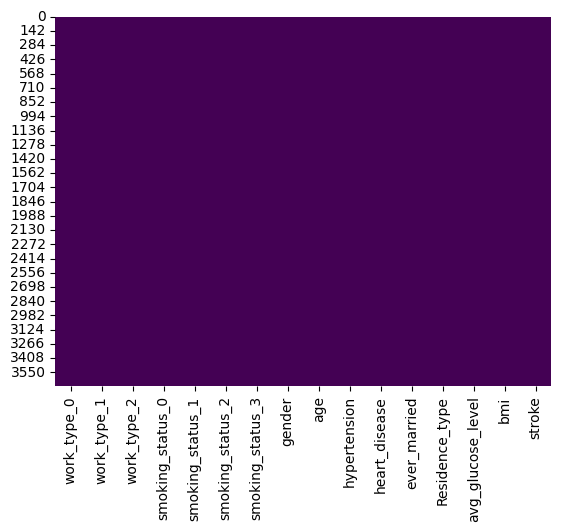

In [50]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

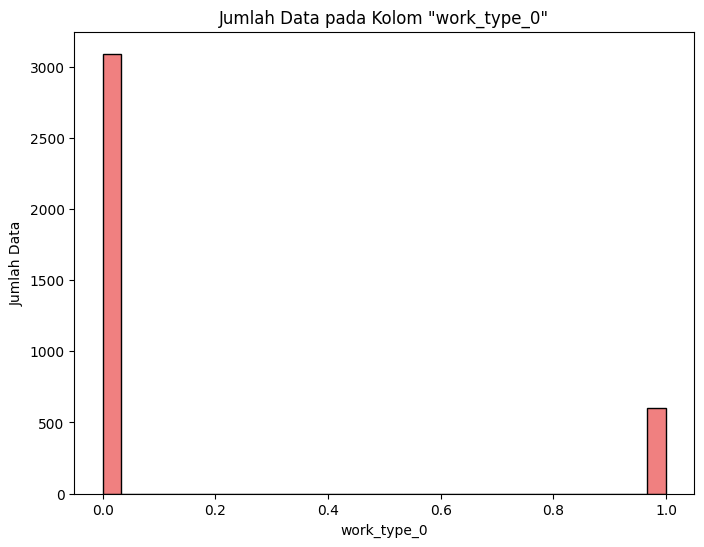

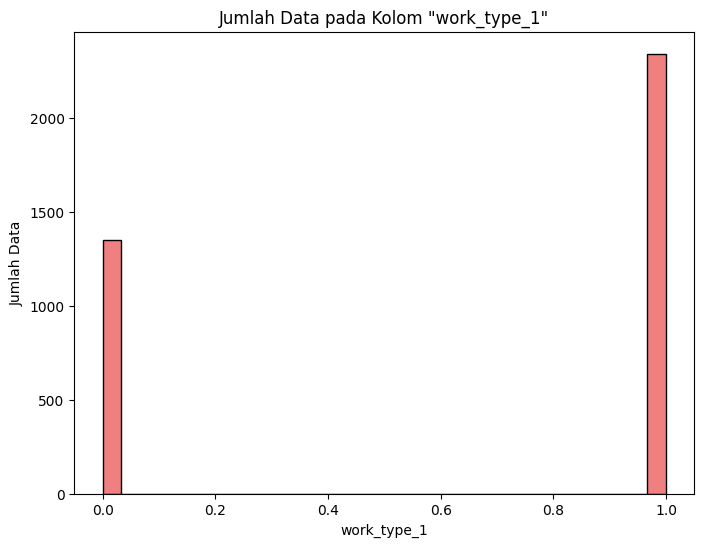

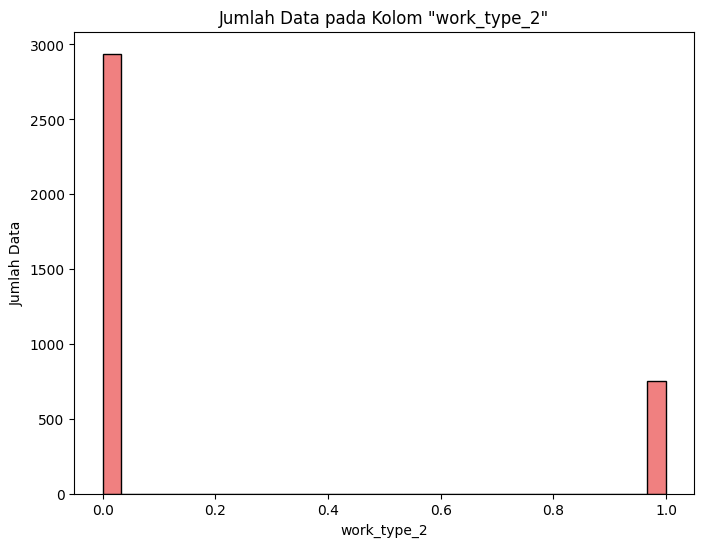

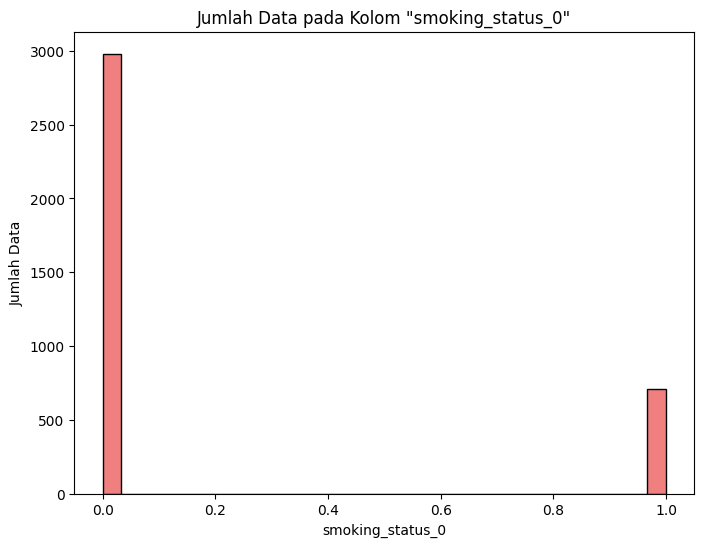

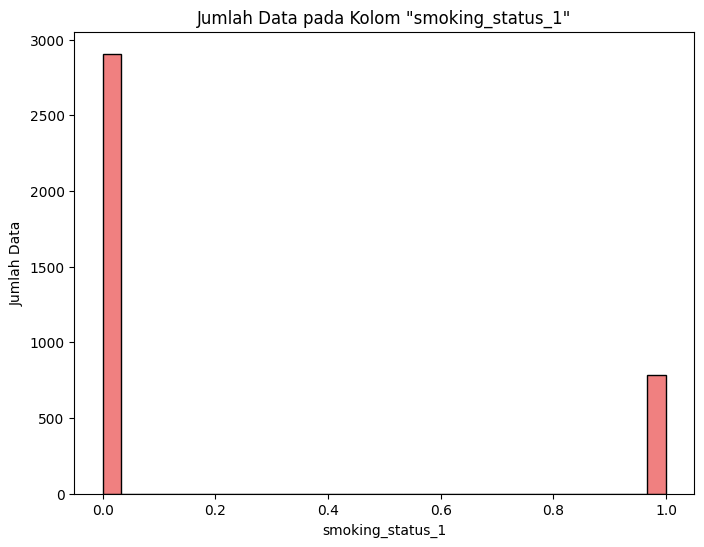

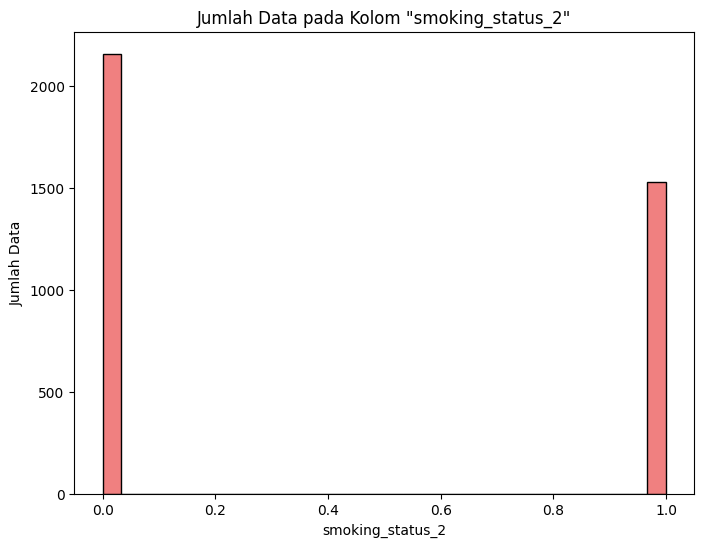

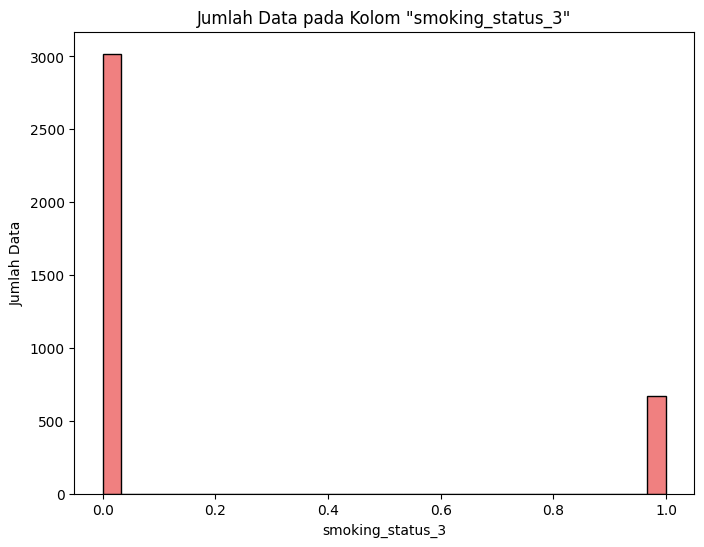

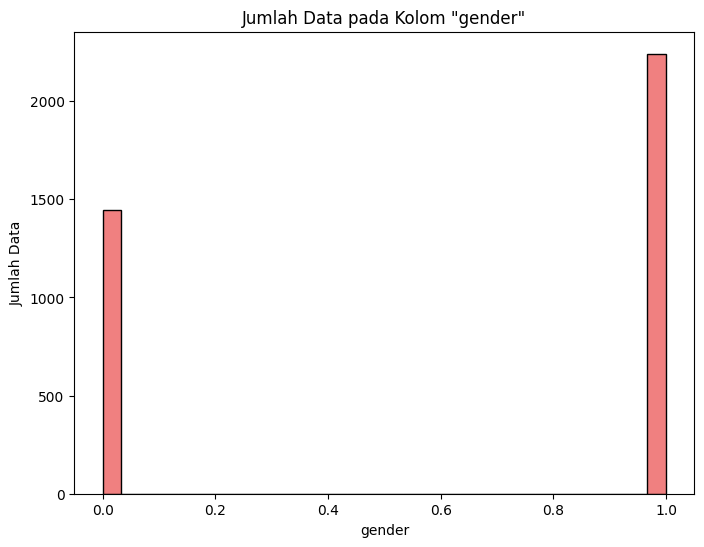

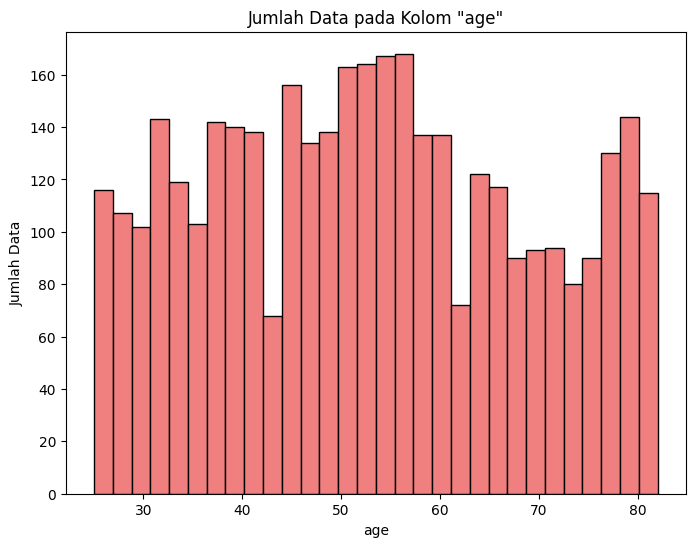

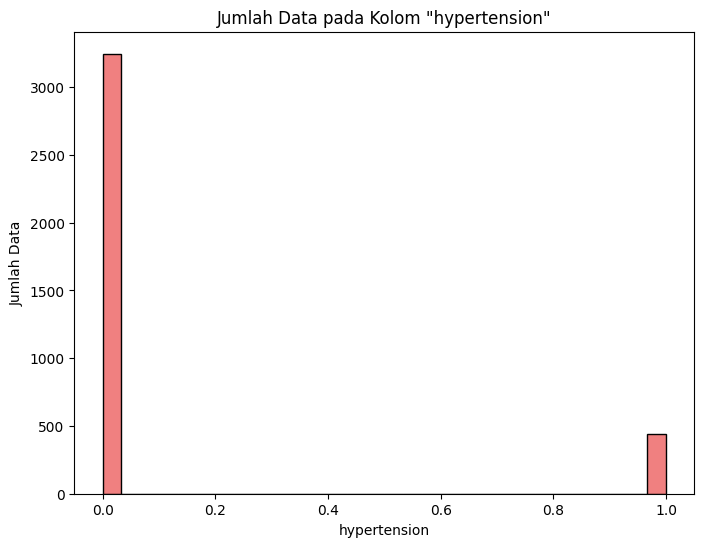

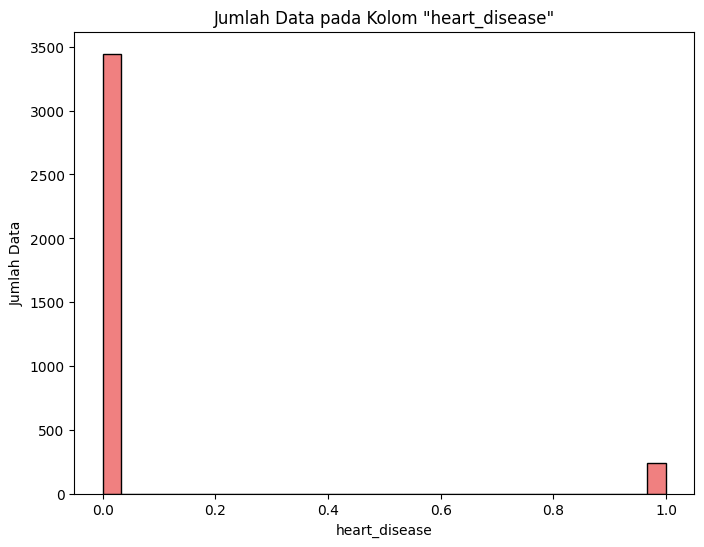

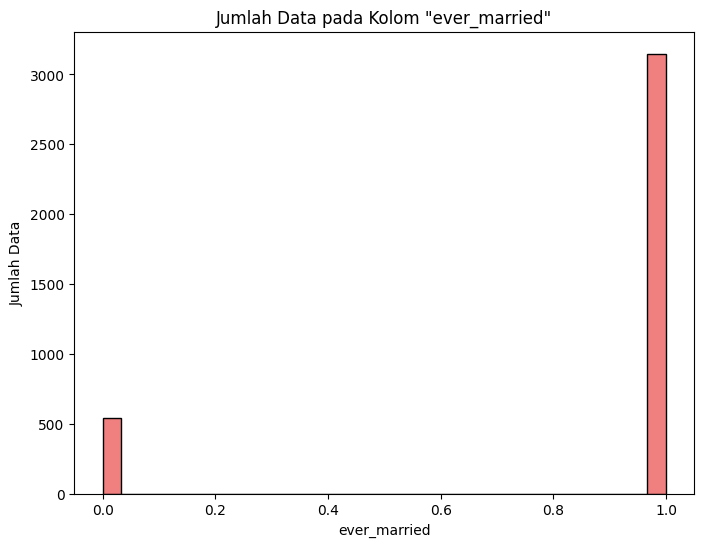

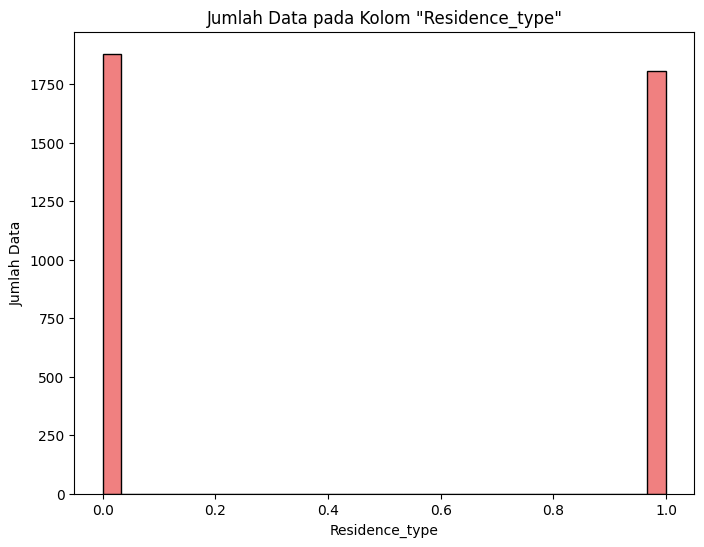

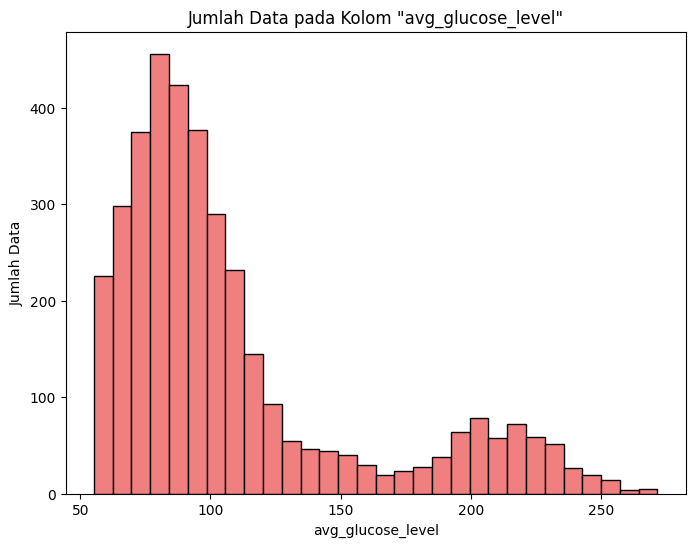

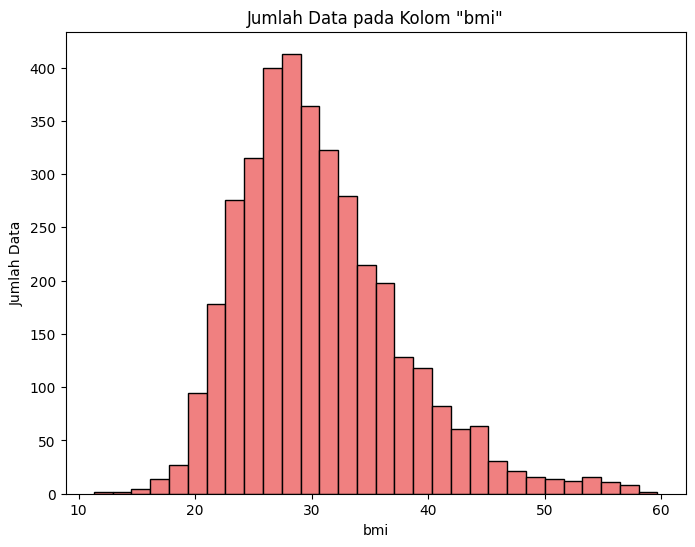

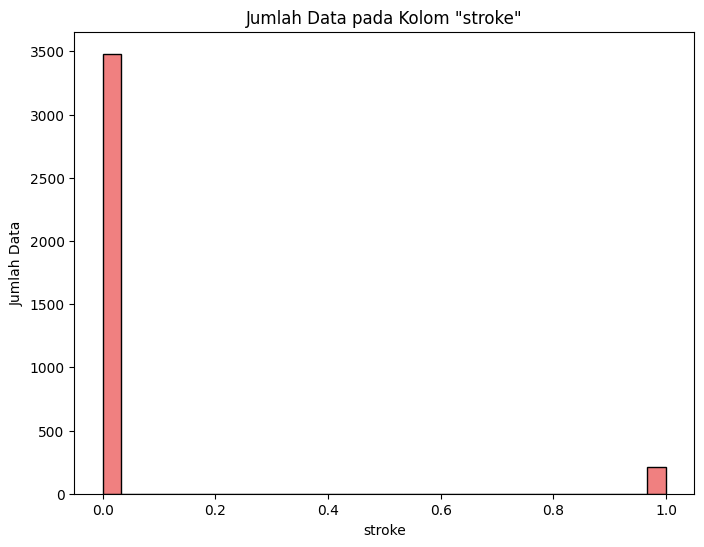

In [51]:
selected_columns = ['work_type_0', 'work_type_1', 'work_type_2', 'smoking_status_0',
                    'smoking_status_1','smoking_status_2','smoking_status_3',
                    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                    'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

In [53]:
df

,work_type_0,work_type_1,work_type_2,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,67.0,0,1,1,0,228.69,36.6,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,80.0,0,1,1,1,105.92,32.5,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,49.0,0,0,1,0,171.23,34.4,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,79.0,1,0,1,1,174.12,24.0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,81.0,0,0,1,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,57.0,0,0,1,1,77.93,21.7,0
3685,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,81.0,0,0,1,0,125.20,40.0,0
3686,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,35.0,0,0,1,1,82.99,30.6,0
3687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,51.0,0,0,1,1,166.29,25.6,0


In [52]:
import shutil

# Simpan DataFrame ke dalam file CSV
df.to_csv('hasil_awal_onehot.csv', index=False)


# Pindahkan file ke direktori yang diinginkan
shutil.move('hasil_awal_onehot.csv', 'D:\Tugas Akhir\Stroke\hasil_awal_onehot.csv')

'D:\\Tugas Akhir\\Stroke\\hasil_awal_onehot.csv'